<a href="https://colab.research.google.com/github/dmakarau/LLM_explore/blob/main/part1_text2num_preparingText4Tokens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import requests
import re

# Get a text from Web

In [ ]:
# get the text from the internet
book = requests.get('https://gutenberg.org/cache/epub/35/pg35.txt')

# get text from the response
text = book.text


In [ ]:
# replace character strings with space
stringsToReplace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

In [ ]:
# use regex to replace those strings with space
for string in stringsToReplace:
  regex = re.compile(r'%s'%string)
  text = regex.sub(' ', text)

# remove non ASCII chars
text = re.sub(r'[^\x00-\x7F]+', ' ', text)

# remove numbers
text = re.sub(r'\d+', ' ', text)

# make everything lowercase
text = text.lower()

text[:2000]

' the project gutenberg ebook of the time machine      this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever. you may copy it, give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org. if you are not located in the united states, you will have to check the laws of the country where you are located before using this ebook.  title: the time machine  author: h. g. wells  release date: october  ,   [ebook # ]                 most recently updated: april  ,    language: english    *** start of the project gutenberg ebook the time machine ***     the time machine  an invention  by h. g. wells   contents   i introduction  ii the machine  iii the time traveller returns  iv time travelling  v in the golden age  vi the sunset of mankind  vii a sudden shock  viii explanation  ix the morlocks  x when night came  xi the palace 

# Parsing a text to words

In [ ]:
# split text by punctuation
import string
puncts4re = rf'[{string.punctuation}\s]+'

words = re.split(puncts4re, text)
words = [item.strip() for item in words if item.strip()]


# remove single-character words
words = [item for item in words if len(item) > 1]


In [ ]:
# create a vocac - unique words
vocab = sorted(set(words))
# convencience variables
words_length = len(words)
vocab_length = len(vocab)
print(f'Number of words: {words_length}')
print(f'Number of unique words: {vocab_length}')

Number of words: 33599
Number of unique words: 4917


# Create token dictionaries and encoder/decoder  functions

In [ ]:
word2idx = { word :index  for index, word in enumerate(vocab)}
idx2word = { index :word  for index, word in enumerate(vocab)}

for i in list(word2idx.items())[:10000:87]:
  print(i)


('abandon', 0)
('age', 87)
('anticipated', 174)
('asleep', 261)
('beard', 348)
('blocks', 435)
('burnt', 522)
('centuries', 609)
('claws', 696)
('computers', 783)
('coral', 870)
('curved', 957)
('delightfully', 1044)
('dined', 1131)
('doorway', 1218)
('eating', 1305)
('entirely', 1392)
('explored', 1479)
('fed', 1566)
('flew', 1653)
('frail', 1740)
('gesture', 1827)
('grief', 1914)
('have', 2001)
('hopeless', 2088)
('impetus', 2175)
('initiative', 2262)
('is', 2349)
('lapsed', 2436)
('likeness', 2523)
('makes', 2610)
('might', 2697)
('much', 2784)
('noises', 2871)
('operation', 2958)
('palps', 3045)
('persistently', 3132)
('portal', 3219)
('project', 3306)
('rags', 3393)
('refrained', 3480)
('result', 3567)
('rushed', 3654)
('seemed', 3741)
('shoes', 3828)
('slam', 3915)
('sons', 4002)
('start', 4089)
('study', 4176)
('sweet', 4263)
('therein', 4350)
('torment', 4437)
('twice', 4524)
('us', 4611)
('volunteer', 4698)
('whence', 4785)
('worn', 4872)


In [ ]:
#encode
def encode(word_list, encode_dict):
  # init a vector with numberical indices
  idxs = np.zeros(len(word_list), dtype=int)

  # loop through the words and find their indices in vocab
  for index, word in enumerate(word_list):
    idxs[index] = encode_dict[word]

  return idxs

# decode
def decode(idx, decode_dict):
  return ' '.join([ decode_dict[i] for i in idx ])


In [ ]:
# testing the encode
print(encode(['the', 'time', 'machine'], word2idx))

# testing the decode
print(decode([4338, 4405, 2596], idx2word))

[4338 4405 2596]
the time machine


In [ ]:
# test encode then decode

# random start location
startidx = np.random.choice(words_length - 10)

# sequential word indices
idxs = np.arange(startidx, startidx + 10)

print("Word indices:")
print(idxs), print('')

print("The words")
wordseq = [ words[i] for i in idxs ]
print(wordseq), print('')

print('Token indices:')
tokenseq = encode(wordseq, word2idx)
print(tokenseq), print('')

print('Decoded sentence:')
print(decode(tokenseq, idx2word))


Word indices:
[15882 15883 15884 15885 15886 15887 15888 15889 15890 15891]

The words
['along', 'the', 'river', 'valley', 'showed', 'how', 'universal', 'were', 'its', 'ramifications']

Token indices:
[ 116 4338 3617 4632 3841 2112 4574 4776 2353 3400]

Decoded sentence:
along the river valley showed how universal were its ramifications


# Exercise 2 A random walk through the time machine

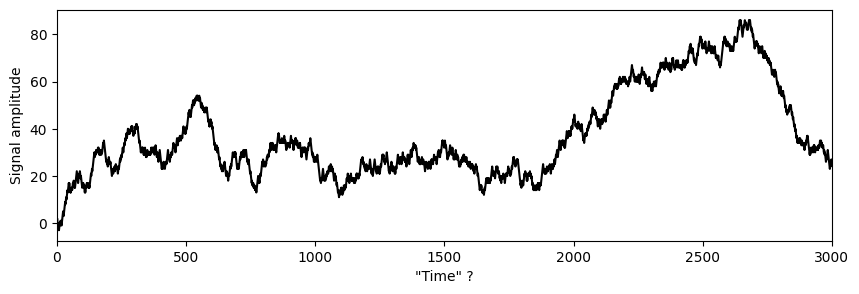

In [ ]:
# A Brief Aside of Brownian Noise
import matplotlib.pyplot as plt
brownNoise = np.cumsum(np.random.choice([-1, 1], 3000))

plt.figure(figsize=(10,3))
plt.plot(brownNoise, 'k')
plt.gca().set(xlim= [0, len(brownNoise)], xlabel = '"Time" ?', ylabel = 'Signal amplitude')
plt.show()

In [ ]:
# Brownian noise
brownNoise = np.cumsum(np.random.choice([-1, 1], 30))
print(brownNoise)

BrownianRandomTokens = brownNoise + np.random.choice(vocab_length, 1)

# test with random token indices
print(f'Token indices: {BrownianRandomTokens}')
print(f'Decoded sentence: {decode(BrownianRandomTokens, idx2word)}')


[-1  0 -1  0 -1  0  1  2  3  4  5  4  3  4  3  4  3  2  1  0 -1 -2 -3 -4
 -3 -2 -3 -2 -1 -2]
Token indices: [1409 1410 1409 1410 1409 1410 1411 1412 1413 1414 1415 1414 1413 1414
 1413 1414 1413 1412 1411 1410 1409 1408 1407 1406 1407 1408 1407 1408
 1409 1408]
Decoded sentence: estuary eternal estuary eternal estuary eternal etiolated eureka even evening ever evening even evening even evening even eureka etiolated eternal estuary estimate essay especially essay estimate essay estimate estuary estimate


# Exercise 3. Distribution of Words Length

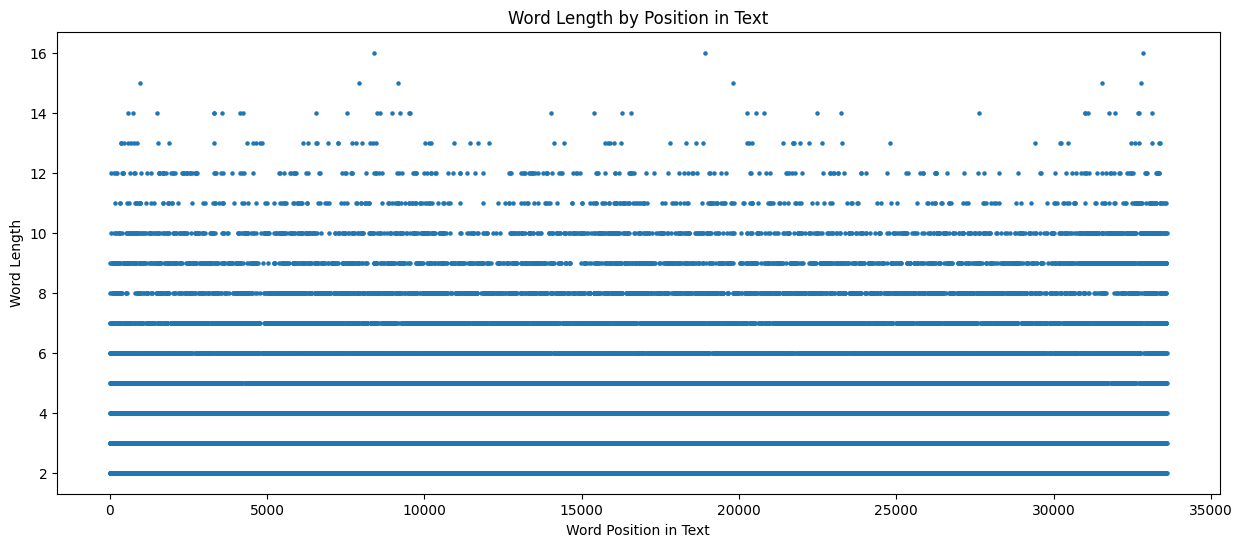

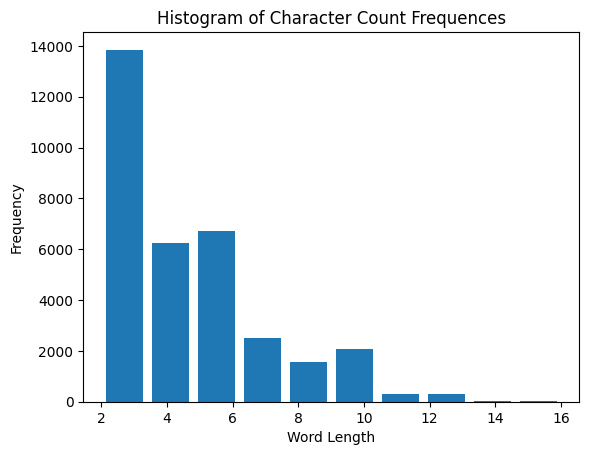

In [ ]:
import matplotlib.pyplot as plt

wordsCount = []
for word in words:
  wordsCount.append(len(word))

# Create a list of indices for the words in the order they appear in the text
word_positions = list(range(len(words)))


# Create the scatter plot
plt.figure(figsize=(15, 6)) # Increased width to 15
plt.scatter(word_positions, wordsCount, s=5) # Use s to adjust marker size

# Add labels and title
plt.xlabel('Word Position in Text')
plt.ylabel('Word Length')
plt.title('Word Length by Position in Text')

# Display the plot
plt.show()

plt.hist(wordsCount,rwidth=0.8)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Histogram of Character Count Frequences')
plt.show()

# Exercise 4. Encode random sentence


In [ ]:
# text to encode
sentence = 'The space aliens  came to Earth to steal watermelons and staplers!!'

# preprocess (remove punctuation, make lower-case, split into words)
puncts4re = rf'[{string.punctuation}\s]+'
words_new = re.split(puncts4re, sentence.lower())

# remove empty items
words_new_without_empty = [ item.strip() for item in words_new if item.strip()]
print(words_new_without_empty)


print("\nWords with empty strings removed:")
print(words_new_without_empty)

#tokenize
encode(words_new, word2idx)

['the', 'space', 'aliens', 'came', 'to', 'earth', 'to', 'steal', 'watermelons', 'and', 'staplers']

Words with empty strings removed:
['the', 'space', 'aliens', 'came', 'to', 'earth', 'to', 'steal', 'watermelons', 'and', 'staplers']


KeyError: 'aliens'

# Exercise 5. Create a new encoder


In [ ]:
# encoding function with unknown token
word2idx_new = word2idx.copy()
idx2word_new = idx2word.copy()

# adding an entry for unknown words
word2idx_new['<|UNK|>'] = len(word2idx_new) + 1
idx2word_new[len(idx2word_new) + 1] = '<|UNK|>'


def encode_unknown(word_list, encode_dict):
  # init a vector with numberical indices
  idxs = np.zeros(len(word_list), dtype=int)

  # loop through the words and find their indices in vocab
  for index, word in enumerate(word_list):
    if word in encode_dict:
      idxs[index] = encode_dict[word]
    else:
      idxs[index] = encode_dict['<|UNK|>']

  return idxs

encode_unknown(words_new, word2idx_new)
decode(encode_unknown(words_new, word2idx_new), idx2word_new)


'the space <|UNK|> came to earth to <|UNK|> <|UNK|> and <|UNK|> <|UNK|>'